# UE2 - Feature Engineering und Klassifikation mit sklearn
Author: Bleyel Andreas

## Aufgabe 2d Kaggle Challenge
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, GridSearchCV

pd.set_option('display.max_columns', 100)

In [4]:
from helper_functions import *

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### Inspektion des Datensets

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


## Impute NA's

Es gibt noch einige NA-Werte im Datensatz. Diese versuchen wir zu imputen

### LotFrontage
Linear feet of street connected to property. Ein numerischer Wert, den wir mit dem Median imputen:

In [11]:
from sklearn.impute import SimpleImputer
data = train

simple_imputer = SimpleImputer(strategy='median')
data['LotFrontage'] = simple_imputer.fit_transform(data[['LotFrontage']])

### Alley

Laut Definition des Datensatzes auf Kaggle sind in Alley folgende Werte enthalten:
- Grvl Gravel
- Pave Paved
- NA No alley access

Wir ersetzen daher NA durch "NoAl":

In [12]:
simple_imputer = SimpleImputer(strategy='constant', fill_value = 'NoAl')
data['Alley'] = simple_imputer.fit_transform(data[['Alley']])

### FireplaceQu
NA bedeutet in diesem Fall, dass es keine Fireplace gibt. Wir ersetzen NA daher durch "No":

In [13]:
simple_imputer = SimpleImputer(strategy='constant', fill_value = 'No')
data['FireplaceQu'] = simple_imputer.fit_transform(data[['FireplaceQu']])

### Garage

Die NA Werte in den Garage-Features treten nur dann auf, wenn es keine Garage gibt:

In [14]:
data.loc[(data.GarageCars>0) | (data.GarageArea>0), data.columns.str.startswith('Garage')].isna().sum()

GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
GarageQual      0
GarageCond      0
dtype: int64

Daher ersetzen wir wieder alle NAs durch "No". Das numerische Attribut `GarageYrBlt` setzen wir auf `YearBuilt`:

In [15]:
data['GarageType'] = simple_imputer.fit_transform(data[['GarageType']])
data['GarageFinish'] = simple_imputer.fit_transform(data[['GarageFinish']])
data['GarageQual'] = simple_imputer.fit_transform(data[['GarageQual']])
data['GarageCond'] = simple_imputer.fit_transform(data[['GarageCond']])

data.loc[data.GarageYrBlt.isna(),'GarageYrBlt'] = data.YearBuilt

### Basement

In [16]:
data.loc[:, data.columns.str.startswith('Bsmt')].isna().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
BsmtFullBath     0
BsmtHalfBath     0
dtype: int64

In [17]:
simple_imputer = SimpleImputer(strategy='constant', fill_value = 'No Basement')

data['BsmtQual'] = simple_imputer.fit_transform(data[['BsmtQual']])
data['BsmtCond'] = simple_imputer.fit_transform(data[['BsmtCond']])
data['BsmtExposure'] = simple_imputer.fit_transform(data[['BsmtExposure']])
data['BsmtFinType1'] = simple_imputer.fit_transform(data[['BsmtFinType1']])
data['BsmtFinType2'] = simple_imputer.fit_transform(data[['BsmtFinType2']])

### PoolQc
Auch in diesem Fall bedeutet NA, dass kein Pool vorhanden ist.

In [18]:
simple_imputer = SimpleImputer(strategy='constant', fill_value = 'No')
data['PoolQC'] = simple_imputer.fit_transform(data[['PoolQC']])

### Fence
NA bedeutet es gibt keinen Zaun.

In [19]:
simple_imputer = SimpleImputer(strategy='constant', fill_value = 'No')
data['Fence'] = simple_imputer.fit_transform(data[['Fence']])

### MiscFeature

kann folgende Werte haben:
- Elev Elevator
- Gar2 2nd Garage (if not described in garage section)
- Othr Other
- Shed Shed (over 100 SF)
- TenC Tennis Court
- NA   None

Wir legen für Shed und Tennis Court eine eigene Variable an. "Elevator" kommt gar nicht vor, "Other" lassen wir weg, da es nichts aussagt.

In [20]:
dummies = pd.get_dummies(data.MiscFeature)
dummies.head(10)

,Gar2,Othr,Shed,TenC
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,1,0
6,0,0,0,0
7,0,0,1,0
8,0,0,0,0
9,0,0,0,0


In [21]:
data = pd.concat([data, dummies[['Shed', 'TenC']]],axis=1)

Wir schauen uns noch das MiscFeature "Gar2" an (2nd Garage). Es gibt nur 2 Einträge, wir erhöhen daher einfach die Anzahl Garagenplätze (GarageCars) um 1.

In [22]:
data.loc[data.MiscFeature == 'Gar2', data.columns.str.startswith('Garage') | (data.columns == 'MiscFeature')]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,MiscFeature
346,Attchd,1960.0,RFn,1,301,TA,TA,Gar2
1230,BuiltIn,1977.0,RFn,2,600,TA,TA,Gar2


In [23]:
data.loc[data.MiscFeature=='Gar2','GarageCars'] = data.GarageCars + 1
data = data.drop('MiscFeature', axis=1)

### Electrical

hier gibt es nur einen NA-Wert, wir ersetzen ihn mit der Most-Frequent-Strateie.

In [24]:
simple_imputer = SimpleImputer(strategy='most_frequent')
data['Electrical'] = simple_imputer.fit_transform(data[['Electrical']])

## Explorative Datenanalyse

Zu Beginn ist gleich einmal zu sehen, dass wir es mit sehr vielen Feature-Variablen zu tun haben. Eine Reduktion auf solche welche einen signifikanten Einfluss auf die Vorhersage der Ziel-Variable "Sales Price" haben, hat die höchste Priorität und wird zuerst behandelt.

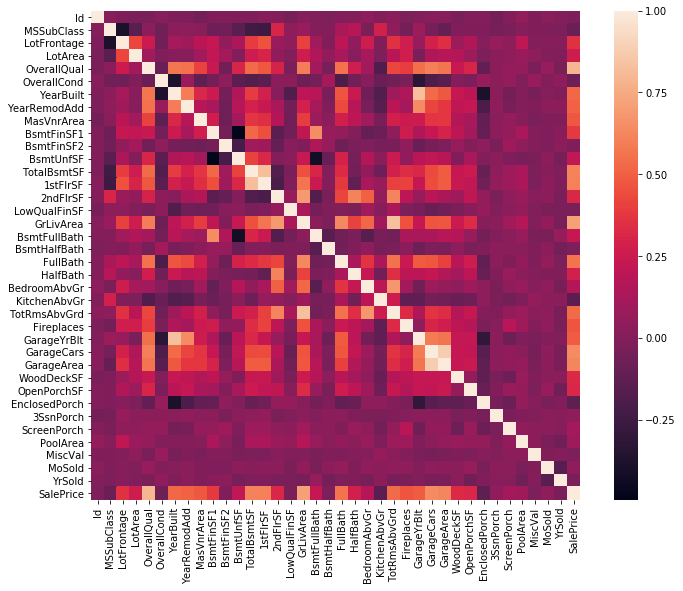

In [14]:
corr = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, square=True);

TotalBsmtSF mit 1FlrSF sowie GarageCars und GarageArea scheine eine hohe Korrelation zu haben. Dies macht auch Sinn da 1stFlrSF und TotalBsmtSF insofern korrelieren, da die Gesamtanzahl der m² und die des ersten Stockes meist sehr ähnlich wenn nicht sogar gleich sind. Genauso ist es nur logisch und leicht erklärbar, dass umso mehr Platz für Autos in einer Garage sind, auch die Fläche der Garage steigt. Zu hinterfragen wäre lediglich, ob eine Multikolinearität vorliegt und es nicht besser wäre, eine der beiden Variablen zu entfernen. Dazu dann später mehr wenn fehlende Werte untersucht werden und sich vielleicht ohnehin eine Variable dadurch von selbst anbietet.

Weitere Pärchen welche korrelieren:

* OverallQual scheint auch mit vielen anderen Variablen zu korrelieren. Auch das erscheint plausibel da schon die Bezeichnung "Overall" auf eine Bewertung von mehreren Attributen hindeutet. Vor allem mit SalePrice scheint (wenig überraschend) eine hohe Korrelation vorzuliegen.
* YearBuilt gemeinsam mit GaragyYrBlt ist auch rational erklärbar.
* GrLivArea und TotRmsAbvGrd.

Variablen welche mit SalesPrice in deutlichem Zusammenhang stehen und einer nähere Betrachtung Wert sind:

* OverallQual
* GarageArea / Cars
* GrLiveArea
* TotalBsmtSF

Der nächste Schritt ist es zu prüfen, welche Variable des Pärchens GarageArea/GarageCars wir für unser Modell genommen wird. GarageArea gibt vor, wieviele Cars Platz finden und bietet sich somit für eine Beibehaltung an. Trotzdem noch ein paar Checks um sicher zu gehen.

In [15]:
checkFeature('GarageArea')

NameError: name 'checkFeature' is not defined

In [ ]:
checkFeature('GarageCars')

Soweit keine fehlenden Werte aber natürlich Datensätze welche den Wert 0 in beiden Spalten enthalten. Dies sind Anwesen ohne Garage was soweit Sinn ergibt. Auch die Anzahl ist ident. Daher belassen wir es vorerst bei GarageArea für die weitere Bearbeitung.

Bevor wir unter die Haube der Ziel-Variable SalesPrice blicken, möchte Ich noch einmal die Variable OverallQual etwas näher betrachten. 

In [ ]:
checkFeature('OverallQual')

OverallQual ist eine Aufteilung in 10 Wertungs-Kategorien. Beginnend bei 1 als schlechteste Kategorie, bishin zu 10 als beste. Dabei handelt es sich um int64 Ganzzahlen welche aber besser als kategoriale Variable dargestellt werden sollten.

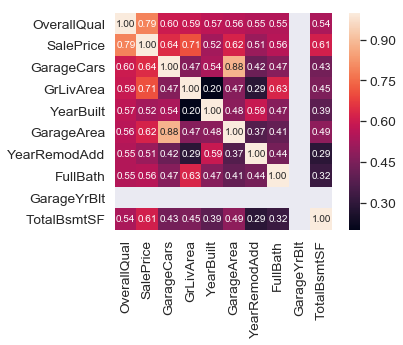

In [16]:
k = 10 
cols = corr.nlargest(k, 'OverallQual')['OverallQual'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Im Vergleich dazu, die 10 Variablen welche den größten Einfluss auf SalePrice haben: 

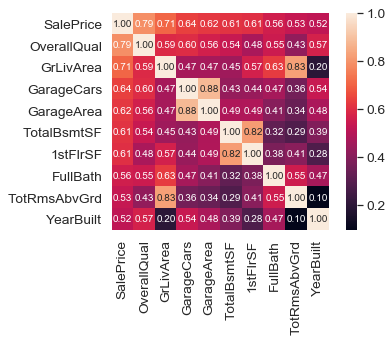

In [17]:
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Man sieht schon, dass einige Variablen in beiden Diagrammen vorkommen. Diese werden in späterer Folge wohl eine wichtige Rolle spielen, daher nachfolgend eine Auflistung mit kurzer Beschreibung:

* YearBuilt - wann das Objekt erbaut wurde
* GarageAreas - Platz der Garage in square feet
* GrLivingArea - Wohnbereich über dem Grund in square fett
* FullBath - Volle Badzimmer über dem Grund. Interessat wäre noch zu wissen, was mit "Voll" gemeint ist.
* TotalBsmtSF - Summe der square feet des Untergeschosses
* OverallQual - Gesamtzustand des Objekts

## Analyse der Feature-Variablen
Kommen wir zurück zu unseren Feature-Variablen. Diese werden wir in den nächsten Schritten einzeln unter die Lupe nehmen und gegebenfalls anpassungen vornehmen.

### YearBuilt
Wann das Objekt erbaut wurde. Erwartet werden Ganzzahlen im üblichen Jahresformat, keine negativen und keine fehlenden Werte.

In [18]:
checkFeature('YearBuilt')

NameError: name 'checkFeature' is not defined

Es war zu erwarten, dass wir hier keine Normalverteilung vorfinden werden. Derzeit ist die Variable noch als numersicher Wert im Datenset. Eine Umwandlung durch OneHotEnconding ist je nach eingesetztem Algorithmus abzuwägen. Auch eine Einteilung in Kategorien wie zB "vor 1900", "1900-1930", "vor 1.WK" etc. könnte eine nähere Untersuchung wert sein. Vorerst ist wichtig, dass wir keine negativen oder fehlenden Werte haben. 

In Verbindung mit SalePrice ist eine schwache logarithmische Kurve (Anstieg) zu erkennen. Interessant wäre zu wissen, ob die Verkaufspreise der Vergangenheit Inflationsbereinigt wurden.

### GarageArea
Platz der Garage in square feet. Erwartet werden float64 Werte, keine negativen und keine fehlenden Werte.

In [19]:
checkFeature('GarageArea')

NameError: name 'checkFeature' is not defined

In [20]:
printSkewKurt('GarageArea')

NameError: name 'printSkewKurt' is not defined

Die Verteilung geht schon in Richtung Normalverteilung könnte aber vielleicht durch eine log-Transformierung verbessert werden. Dies prüfen wir im nächsten Schritt. Natürlich gibt es die "Ausreißer" mit 0ft² von Objekten welche keine Garage besitzen. Um diese müssen wir uns zuvor kümmer da wir 0 Werte nicht log-Transformieren können. 

Auffallend die die 4 Ausreißer rechts unten welche auf sehr große Garagen aber trotzdem einen niedrigen Verkaufspreis darstellen. Werfen wir einen genaueren Blick auf diese 4 Objekte.

In [21]:
train.nlargest(4, columns=['GarageArea'])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,BrkFace,306.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,2042,2042,GasA,Ex,Y,SBrkr,2042,0,0,2042,0,0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2009.0,RFn,3,1390,TA,TA,Y,0,90,0,0,0,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,2fmCon,1Story,4,4,1961,1975,Gable,CompShg,MetalSd,MetalSd,Stone,149.0,TA,Gd,CBlock,TA,TA,Av,BLQ,1159,Unf,0,90,1249,GasA,Ex,Y,SBrkr,1622,0,0,1622,1,0,1,0,3,1,TA,7,Typ,1,TA,2Types,1975.0,Fin,4,1356,TA,TA,Y,439,0,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,TA,Y,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1994.0,RFn,3,1248,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000


Bei diesen 4 Objekten konnten keine Auffälligkeiten gefunden werden. Belassen wir sie im Datensatz. Die Beziehung zwischen GarageArea und SalePrice ist wenn dann nur schwach linear. 

Um die log-Transformierung durchzuführen fügen wir dem Datenset die Spalte "hasGarage" hinzu welchen einen Binärwert halten wird. 0=keine Garage 1=hat Garage

In [22]:
train['HasGarage'] = pd.Series(len(train['GarageArea']), index=train.index)
train['HasGarage'] = 0 
train.loc[train['GarageArea']>0,'HasGarage'] = 1

Nun können wir die log-Transformierung nur auf die Zeilen anwenden, welche in "hasGarage" 1 haben. 

In [23]:
train.loc[train['HasGarage']==1,'GarageArea'] = np.log(train['GarageArea'])

c:\users\birgi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


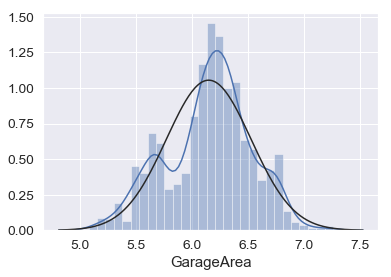

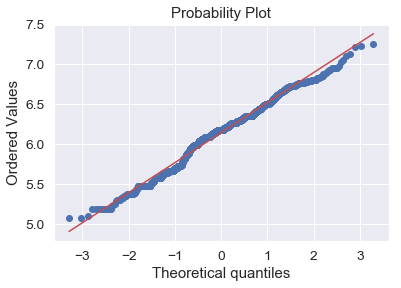

In [24]:
sns.distplot(train[train['GarageArea']>0]['GarageArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['GarageArea']>0]['GarageArea'], plot=plt)

In [25]:
print("Skewness: %f" % train[train['GarageArea']>0]['GarageArea'].skew())
print("Kurtosis: %f" % train[train['GarageArea']>0]['GarageArea'].kurt())

Skewness: -0.250541
Kurtosis: -0.227852


Es scheint als hätten wir uns ein wenig von der Normalverteilung wegbewegt weshalb wird von einer log-Transformierung von "GarageArea" absehen werden.

### GrLivArea
Wohnbereich über dem Grund in square feet. Erwartet werden float64 Werte, keine negativen und keine fehlenden Werte.

In [26]:
checkFeature('GrLivArea')

NameError: name 'checkFeature' is not defined

In [27]:
printSkewKurt('GrLivArea')

NameError: name 'printSkewKurt' is not defined

Verteilung scheint in Ordnung und es liegt eine lineare Beziehung vor. Dies war auch so zu erwarten dass mit steigender Größe des Wohnbereichs auch der Verkaufspreis ansteigt.

Trotzdem starten wir auch hier den Versuch einer log-Transformation und sehen wie sich die Verteilung ändert.

In [28]:
train['GrLivArea'] = np.log(train['GrLivArea'])

In [29]:
checkFeature('GrLivArea')

NameError: name 'checkFeature' is not defined

In [30]:
printSkewKurt('GrLivArea')

NameError: name 'printSkewKurt' is not defined

Sieht deutlich besser aus weshalb wir die log-Transformierung beibehalten werden.

### FullBath

Volle Badzimmer über dem Grund. Erwartet werden Ganzzahlen, keine negativen und keine fehlenden Werte.

In [31]:
checkFeature('FullBath')

NameError: name 'checkFeature' is not defined

Wir sehen, es gibt 4 Kategorien von Bädern. 0-4 Stück pro Objekt. Eine Umwandlung in kategorische Variablen ist nicht wünschenswert da wir die Wertung beibehalten wollen. Mehr Badezimmer sind nunmal mehr wert als weniger.

### TotalBsmtSF
Summe der square feet des Kellers. Erwartet werden float Werte, keine negativen und keine fehlenden Werte.

In [32]:
checkFeature('TotalBsmtSF')

NameError: name 'checkFeature' is not defined

Auch hier sieht es nach einer linearen Beziehung aus bei der eine schöne Verteilung vorliegt. Die einzige Sache welche zu bedenken ist, wie gehen wir mit den 0 Werten (kein Keller) um. Wir wenden die selbe Vorgehensweise als bei "GarageArea" an da die Ausgangssituation nahezu ident ist und prüfen, ob eine log-Transformation Sinn macht.

In [33]:
printSkewKurt('TotalBsmtSF')

NameError: name 'printSkewKurt' is not defined

In [34]:
train['HasBasement'] = pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['HasBasement'] = 0 
train.loc[train['TotalBsmtSF']>0,'HasBasement'] = 1

In [35]:
train.loc[train['HasBasement']==1,'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])

c:\users\birgi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


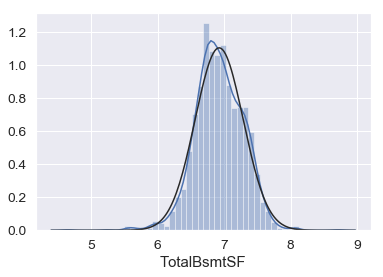

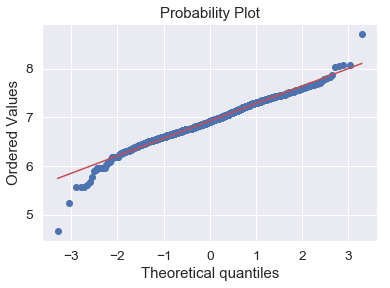

In [36]:
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [37]:
print("Skewness: %f" % train[train['TotalBsmtSF']>0]['TotalBsmtSF'].skew())
print("Kurtosis: %f" % train[train['TotalBsmtSF']>0]['TotalBsmtSF'].kurt())

Skewness: -0.275816
Kurtosis: 1.934678


Auch hier sieht es nach einer Verbesserung im Sinne von einer Annäherung an eine Normalverteilung aus weshalb die log-Transformierung beibehalten wird.

### OverallQual
Gesamtzustand des Objekts. 10 Kategorien von 1-10 wobei 1 die schlechteste und 10 die beste Bewertung darstellt.

In [38]:
checkFeature('OverallQual')

NameError: name 'checkFeature' is not defined

### Zusammenfassung der Analyse der Feature-Variablen
Nach Begutachtung der vielversprechendsten Feature-Variablen wird das Trainings-Datenset wie folgt aufgebaut:

* YearBuilt - wird nicht geändert
* GarageAreas - wird nicht geändert (GarageCars wird weggelassen)
* GrLivingArea - log-Transformierung
* FullBath - wird nicht geändert
* TotalBsmtSF - log-Transformierung
* OverallQual - wird nicht geändert

## Ziel-Variable SalesPrice
Als nächste wird unsere Ziel-Variable etwas genauer unter die Lupe genommen. Die Erwartung ist, dass es sich um einen numerischen Wert handelt welcher angibt, um welchen USD Betrag die Immobilie verkauft wurde. Da es sich um einen Verkaufspreis handelt, nehme ich im Vorfeld an, dass es sich um keine Normalverteilung handeln wird und wir eine log-Transformierung vornehmen werden müssen. Negative Werte werden ebenfalls nicht erwartet. Lassen wir die Zahlen sprechen.

In [39]:
checkFeature('SalePrice')

NameError: name 'checkFeature' is not defined

Wie erwartet bestätigen sich die beiden Annahmen, dass es sich um keine Normalverteilung handelt und keine negativen Werte vorhanden sind. Mittels Scatterplot-Matrix betrachten wir die Zusammenhänge unserer Ziel-Variable mit den bereits weiter oben gefundenen vielversprechenden Feature-Variablen
* YearBuilt - wann das Objekt erbaut wurde
* GarageArea - Platz der Garage in square feet
* GrLivingArea - Wohnbereich über dem Grund in square fett
* FullBath - Volle Badzimmer über dem Grund. Interessat wäre noch zu wissen, was mit "Voll" gemeint ist.
* TotalBsmtSF - Summe der square feet des Keller

c:\users\birgi\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


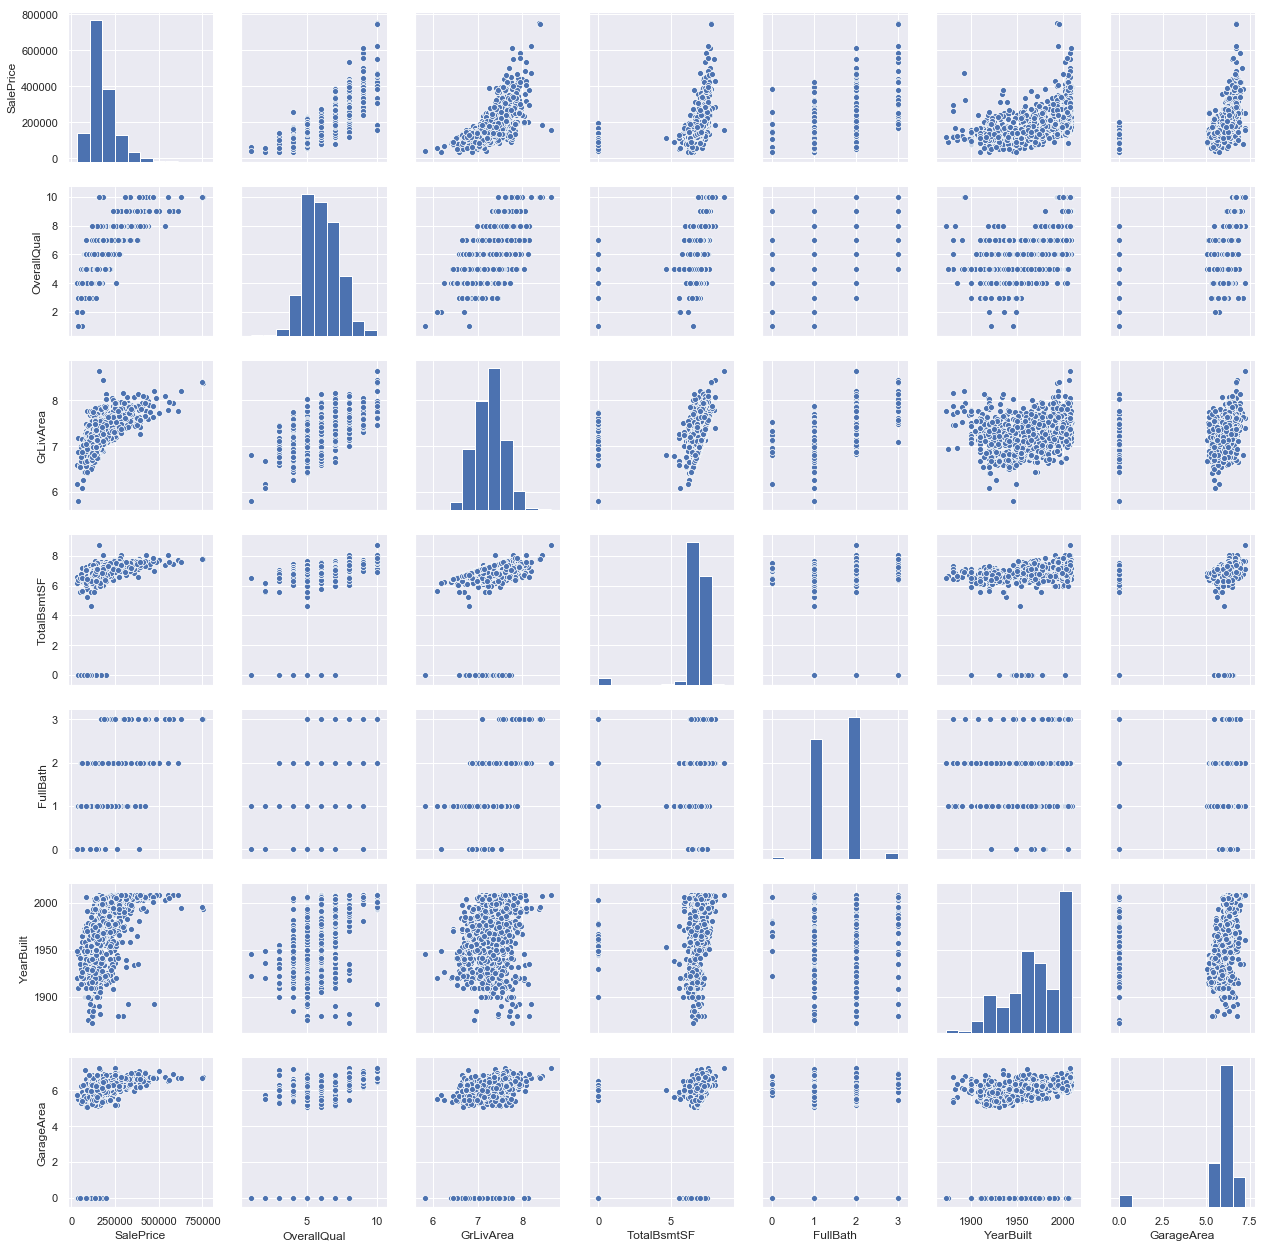

In [40]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'GarageArea']
sns.pairplot(train[cols], size = 2.5)
plt.show();

Die Scatter-Plots zeigen keine Überraschungen. SalesPrice zeigt 4 Punkte welche herausstechen und möglicherweise Outlier sind. Bei TotalBsmtSF ist vor allem ein Punkt sehr markant weit außen und einer näheren Betrachtung wert. Wir wollen aber zuerst noch SalesPrice weiter analysieren und beginnen mit deren Skalierung und log-Transformation.

In [41]:
y = train['SalePrice'].values.reshape(-1,1)

In [42]:
robust_scaler_y = RobustScaler()
robust_scaler_y.fit(y)
salePrice_scaled_robust = robust_scaler_y.transform(y)

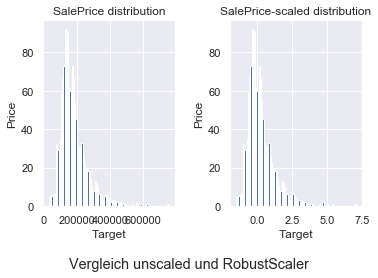

In [43]:
f, (ax0, ax1) = plt.subplots(1, 2)

ax0.hist(train['SalePrice'].values, bins=100)
ax0.set_ylabel('Price')
ax0.set_xlabel('Target')
ax0.set_title('SalePrice distribution')

ax1.hist(salePrice_scaled_robust, bins=100)
ax1.set_ylabel('Price')
ax1.set_xlabel('Target')
ax1.set_title('SalePrice-scaled distribution')

f.suptitle("Vergleich unscaled und RobustScaler", y=0.035)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

Zeit die log-Transformation anzuwenden.

In [44]:
train['SalePrice'] = np.log(train['SalePrice'])
checkFeature('SalePrice')

NameError: name 'checkFeature' is not defined

In [47]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasGarage,HasBasement
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,6.752270,GasA,Ex,Y,SBrkr,856,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,6.306275,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694,1,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,7.140453,GasA,Ex,Y,SBrkr,1262,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,6.131226,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011,1,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,6.824374,GasA,Ex,Y,SBrkr,920,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,6.410175,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167,1,1


Nach Skalierung und der log-Transformation ist jetzt eine besser Verteilung der Ziel-Variable gegeben. Der Probability-Plot (eine Spezialform des Q-Q Plots) zeigt uns, dass die Daten nahe an der roten Linie liegen was auf eine Normalverteilung deutet. Dies wird durch das darüber befindliche Histogramm ebenfalls bestätigt wodurch unsere Ziel-Variable soweit für die Modellierung vorbereitet ist.

### Aufbau Test und Train Datenset

In [48]:
features = ['YearBuilt','GarageArea','OverallQual', 'GrLivArea', 'TotalBsmtSF', 'FullBath']

In [49]:
test_reduced = pd.read_csv('test.csv')[features].copy()

In [50]:
test_reduced.fillna(test_reduced.mean(), inplace=True)

In [51]:
test_reduced.isna().sum()

YearBuilt      0
GarageArea     0
OverallQual    0
GrLivArea      0
TotalBsmtSF    0
FullBath       0
dtype: int64

In [52]:
test_reduced['HasBasement'] = pd.Series(len(test_reduced['TotalBsmtSF']), index=test_reduced.index)
test_reduced['HasBasement'] = 0
test_reduced.loc[test_reduced['TotalBsmtSF']>0,'HasBasement'] = 1
test_reduced.loc[test_reduced['HasBasement']==1,'TotalBsmtSF'] = np.log(test_reduced['TotalBsmtSF'])
test_reduced['GrLivArea'] = np.log(test_reduced['GrLivArea'])

c:\users\birgi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [53]:
test_reduced.drop('HasBasement', inplace=True, axis=1)

In [54]:
test_reduced.head(3)

,YearBuilt,GarageArea,OverallQual,GrLivArea,TotalBsmtSF,FullBath
0,1961,730.0,5,6.797940,6.782192,1
1,1958,312.0,6,7.192182,7.192182,1
2,1997,482.0,5,7.395722,6.833032,2


In [55]:
test_reduced.shape

(1459, 6)

In [56]:
features.append('SalePrice')
features

['YearBuilt',
 'GarageArea',
 'OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 'FullBath',
 'SalePrice']

In [57]:
train_reduced = pd.read_csv('train.csv')[features].copy()

In [58]:
train_reduced['HasBasement'] = pd.Series(len(train_reduced['TotalBsmtSF']), index=train_reduced.index)
train_reduced['HasBasement'] = 0 
train_reduced.loc[train_reduced['TotalBsmtSF']>0,'HasBasement'] = 1
train_reduced.loc[train_reduced['HasBasement']==1,'TotalBsmtSF'] = np.log(train_reduced['TotalBsmtSF'])
train_reduced['GrLivArea'] = np.log(train_reduced['GrLivArea'])
train_reduced['SalePrice'] = np.log(train_reduced['SalePrice'])

c:\users\birgi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [59]:
train_reduced.drop('HasBasement', inplace=True, axis=1)

In [60]:
train_reduced.head(3)

,YearBuilt,GarageArea,OverallQual,GrLivArea,TotalBsmtSF,FullBath,SalePrice
0,2003,548,7,7.444249,6.752270,2,12.247694
1,1976,460,6,7.140453,7.140453,2,12.109011
2,2001,608,7,7.487734,6.824374,2,12.317167


In [61]:
train_reduced.shape

(1460, 7)

In [62]:
train_reduced.isna().sum()

YearBuilt      0
GarageArea     0
OverallQual    0
GrLivArea      0
TotalBsmtSF    0
FullBath       0
SalePrice      0
dtype: int64

## Prädiktion

In [63]:
features.remove('SalePrice')

In [64]:
y = train_reduced['SalePrice']
X = train_reduced[features]

### Lineares Modell

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
(lin_reg.score(X_test, y_test),lin_reg.score(X_train, y_train))

(0.7963565021043311, 0.8210381119014932)

### Random Forrest

Einfach ohne Parameter Tuning:

In [22]:
forest_regressor = RandomForestRegressor(n_estimators=10)
forest_regressor.fit(X, y.ravel())
forest_regressor.score(X, y)

0.9683352873474684

In [23]:
forest_pred_y = forest_regressor.predict(test_reduced)
forest_pred_y = np.exp(forest_pred_y)
forest_pred_y

array([131039.47827211, 139129.46229033, 150250.09426707, ...,
       151697.64245361, 100187.96538208, 231177.9386026 ])

Hyperparameter Tuning mittels K-Fold und Gridsearch

In [32]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [34]:
rf_tuned = RandomForestRegressor()

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf_tuned, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X, y.ravel())

## WICHTIG: Laufzeit mit 5Kfold ca 10min

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  9.4min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [35]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [37]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [15, 20, 30, 40],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [3, 5, 10],
    'n_estimators': [100, 200, 300, 1000]
}

In [38]:
rf_tunded_grid = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_tunded_grid, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [39]:
#LAUFZEIT 7min
grid_search.fit(X, y)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [15, 20, 30, 40], 'max_features': [2, 3], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [3, 5, 10], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [40]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [41]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [44]:
grid_search.score(X,y)

0.9558900149064868

In [42]:
rf_tuned_pred_y = grid_search.predict(test_reduced)
rf_tuned_pred_y = np.exp(rf_tuned_pred_y)
rf_tuned_pred_y

array([131161.64751049, 148064.38334404, 170605.88076372, ...,
       144585.64863236, 110263.51306858, 231565.38616114])

### Submission File erzeugen

In [43]:
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': rf_tuned_pred_y})
my_submission.to_csv('submission.csv', index=False)